In [3]:
import pickle as pkl
import numpy as np
import seaborn as sns
%matplotlib inline

X_real = pkl.load(open('./data/X_processed.pkl', 'rb'))
y_real = pkl.load(open('./data/y_processed.pkl', 'rb'))

print(X_real.shape, y_real.shape)


((6502, 3, 12), (6502,))


In [4]:
output_dir = './output/'
public_dir = output_dir + 'public'
private_dir = output_dir + '4.0_0.0001_500_0.002_100'

## Figure 1 Training

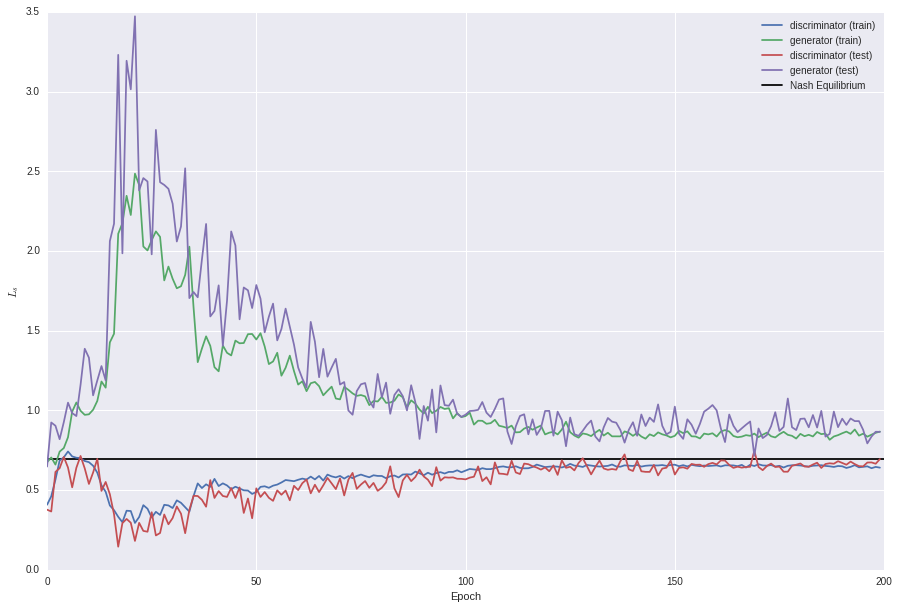

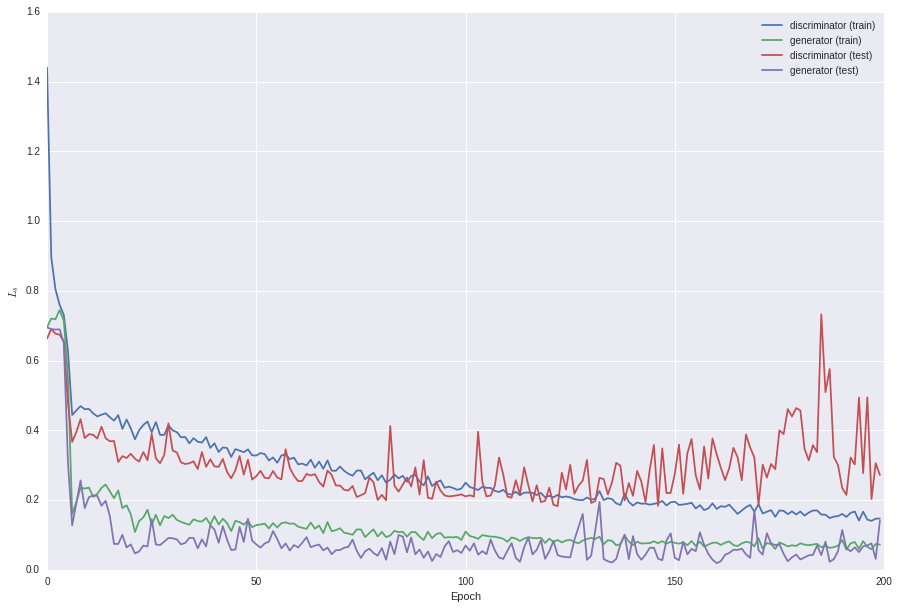

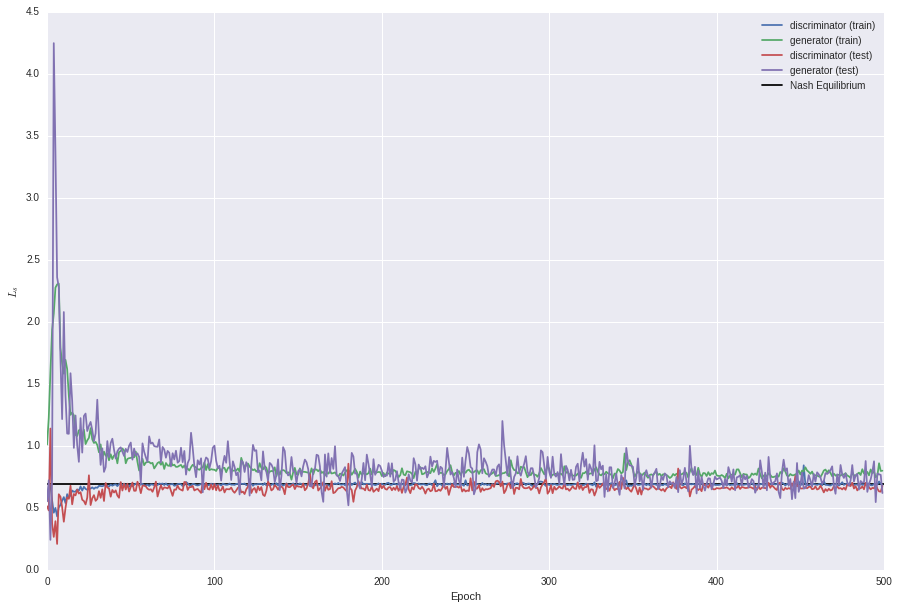

In [5]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.figure(figsize=(15,10))

hist = pkl.load(open(public_dir + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['generation_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.hlines(-np.log(0.5), 0, hist[p][g]['generation_loss'].shape[0], label='Nash Equilibrium')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')

plt.show()

plt.figure(figsize=(15,10))
hist = pkl.load(open(public_dir + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['auxiliary_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')
plt.show()

plt.figure(figsize=(15,10))
hist = pkl.load(open(private_dir + '/acgan-history.pkl', 'rb'))
losses = ['loss', 'generation_loss', 'auxiliary_loss']

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        hist[p][g] = pd.DataFrame(hist[p][g], columns=losses)

for p in ['train', 'test']:
    for g in ['discriminator', 'generator']:
        plt.plot(hist[p][g]['generation_loss'], label='{} ({})'.format(g, p))

# get the NE and show as an equilibrium point
plt.hlines(-np.log(0.5), 0, hist[p][g]['generation_loss'].shape[0], label='Nash Equilibrium')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')
plt.show()

## Generate Samples

In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from keras.models import load_model

acgan = __import__('ac_gan')

# public_gen = load_model('./output/acgan_200_0.002_100/params_generator_epoch_142.h5') 
public_gen = load_model(public_dir + '/params_generator_epoch_150.h5')
private_gen = load_model(private_dir + '/params_generator_epoch_199.h5')

public_gen.summary()

generate_count = 6000
latent_size = 100
print(generate_count, latent_size)

noise = np.random.uniform(-1, 1, (generate_count, latent_size))
sampled_labels = np.random.randint(0, 2, generate_count)

print(noise.shape, sampled_labels.shape)

X_public = public_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)
y_public = sampled_labels

X_private = private_gen.predict([noise, sampled_labels.reshape((-1, 1))], verbose=0)
y_private = sampled_labels

X_public = X_public.reshape(X_public.shape[0], X_public.shape[2], X_public.shape[3]).clip(min=0).astype('int')
X_private = X_private.reshape(X_private.shape[0], X_private.shape[2], X_private.shape[3]).clip(min=0).astype('int')

X_train = X_real[:generate_count]
X_test = X_real[generate_count:]

y_train = y_real[:generate_count]
y_test = y_real[generate_count:]


print(X_public.shape)
print(X_private.shape)
print(X_real.shape)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 1)             0                                            
____________________________________________________________________________________________________
embedding_1 (Embedding)          (None, 1, 100)        200                                          
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 100)           0                                            
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 100)           0                                            
___________________________________________________________________________________________

## Table 1 - Summary Statistics

In [37]:
# real, public, private
stats_dict = {}
stats_dict['overall_mean_sp'] = [np.mean(X_train[:, 0, :]), np.mean(X_public[:, 0, :]), np.mean(X_private[:, 0, :])]
stats_dict['overall_mean_dp'] = [np.mean(X_train[:, 1, :]), np.mean(X_public[:, 1, :]), np.mean(X_private[:, 1, :])]
stats_dict['overall_mean_meds'] = [np.mean(X_train[:, 2, :]), np.mean(X_public[:, 2, :]), np.mean(X_private[:, 2, :])]

print(stats_dict)

{'overall_mean_dp': [72.023236111111117, 69.692888888888888, 76.678847222222217], 'overall_mean_meds': [2.2674861111111113, 1.3667916666666666, 2.4221944444444445], 'overall_mean_sp': [129.01034722222221, 124.75827777777778, 129.1608611111111]}


[[[145 124 117 136 145 144 144 167 120 113 128 117]
  [ 80  68  71  77  83  83  80  87  65  61  69  69]
  [  3   3   2   2   2   2   3   3   2   2   3   3]]

 [[138 154 137 131 147 137 139 140 169 142 146 135]
  [ 71  74  68  62  76  65  71  65  72  73  70  74]
  [  1   1   1   1   2   1   1   1   1   1   2   2]]

 [[123 133 126 139 117 150 132 142 145 127 139 151]
  [ 68  62  63  64  60  68  67  68  60  63  66  70]
  [  1   1   1   1   0   1   1   1   1   1   1   1]]]
((3236, 3, 12), (3266, 3, 12))
((2951, 3, 12), (3049, 3, 12))
((2951, 3, 12), (3049, 3, 12))
[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592], [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]


AttributeError: 'AxesSubplot' object has no attribute 'axlabel'

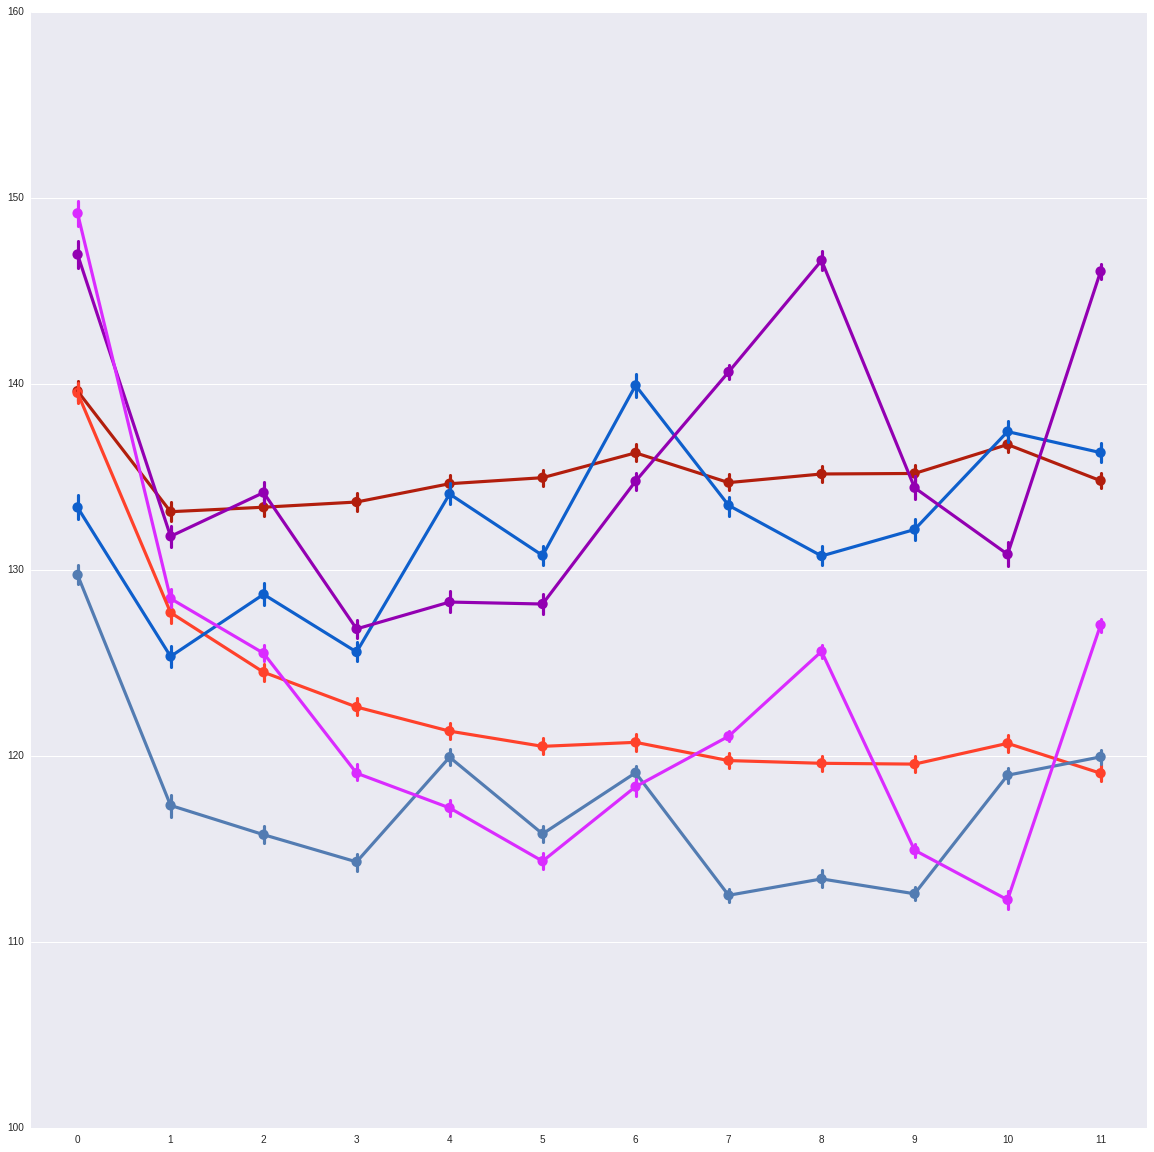

In [57]:
from numpy import median 

standard_real = X_real[y_real==0] 
intensive_real = X_real[y_real==1]

standard_public = X_public[y_public==0] 
intensive_public = X_public[y_public==1]

standard_private = X_private[y_private==0] 
intensive_private = X_private[y_private==1]

print(standard_real[:3])
print(standard_real.shape, intensive_real.shape)
print(standard_public.shape, intensive_public.shape)
print(standard_private.shape, intensive_private.shape)

standard_real_sbp = standard_real[:, 0, :]
intensive_real_sbp = intensive_real[:, 0, :]

standard_public_sbp = standard_public[:, 0, :]
intensive_public_sbp =  intensive_public[:, 0, :]

standard_private_sbp = standard_private[:, 0, :]
intensive_private_sbp = intensive_private[:, 0, :]

print(sns.cubehelix_palette(n_colors=2, start=0))
colors = ['#B21E0D', '#FF412B', '#0E5FCC', '#537CB2', '#9300B2', '#DA2BFF']

plt.figure(figsize=(20, 20))
ax = sns.pointplot(data=standard_real_sbp, esitmator=median, color=colors[0], label='Real Standard')
ax = sns.pointplot(data=intensive_real_sbp, esitmator=median, color=colors[1], label='Real Intensive')

ax = sns.pointplot(data=standard_public_sbp, esitmator=median, color=colors[2], label='Public Standard')
ax = sns.pointplot(data=intensive_public_sbp, esitmator=median, color=colors[3], label='Public Intensive')

ax = sns.pointplot(data=standard_private_sbp, esitmator=median, color=colors[4], label='Private Standard')
ax = sns.pointplot(data=intensive_private_sbp, esitmator=median, color=colors[5], label='Private Intensive')
ax.axlabel()


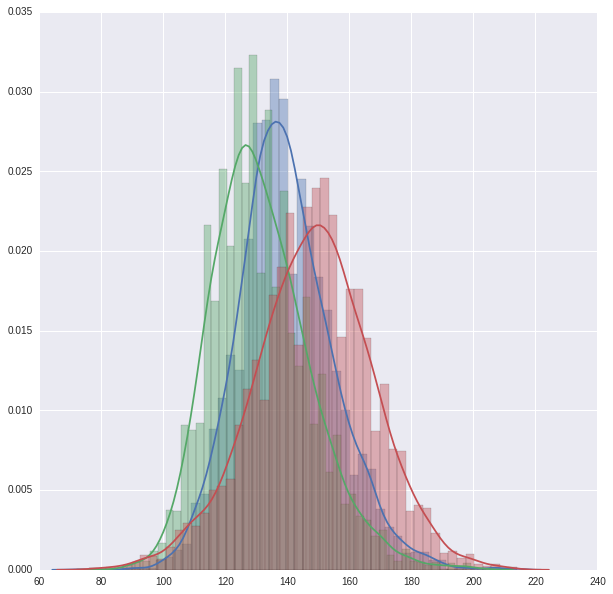

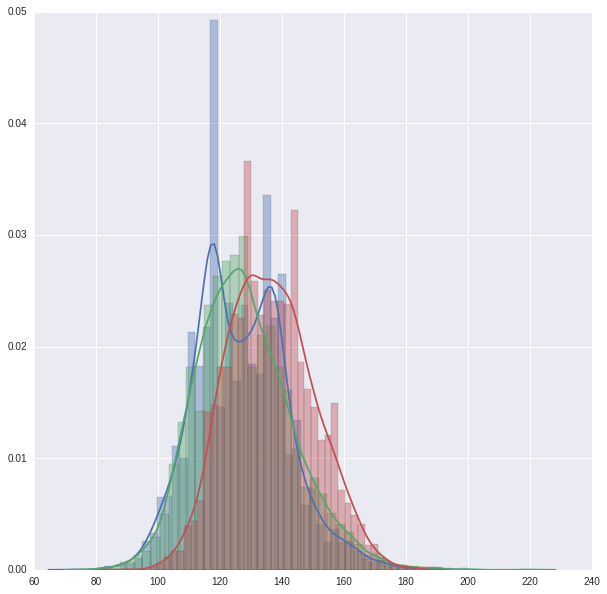

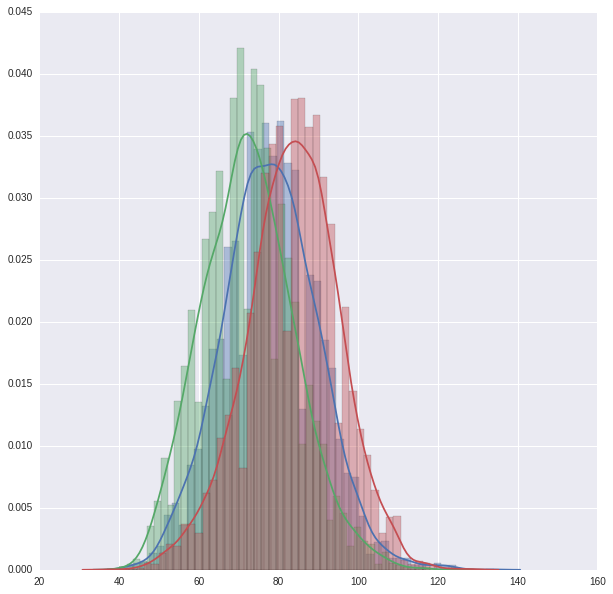

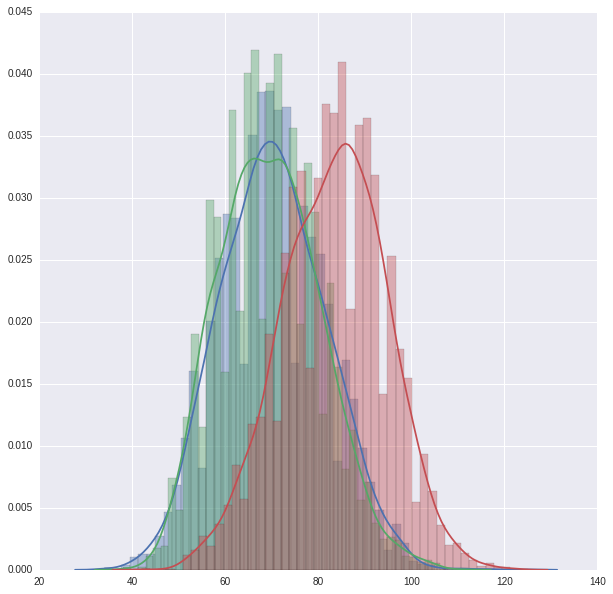

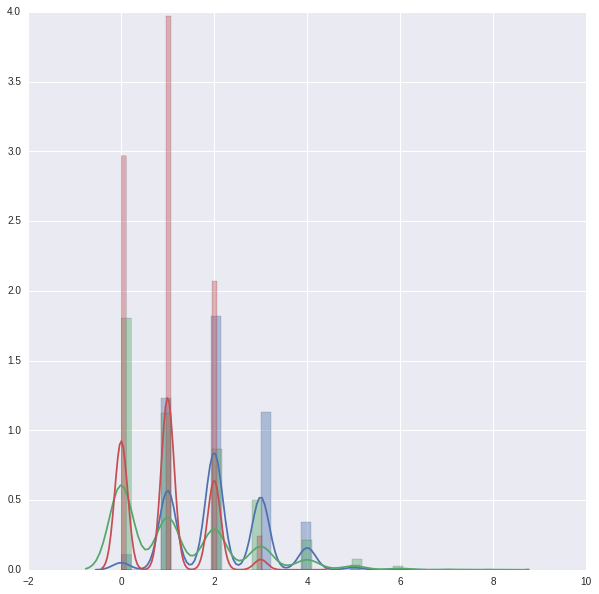

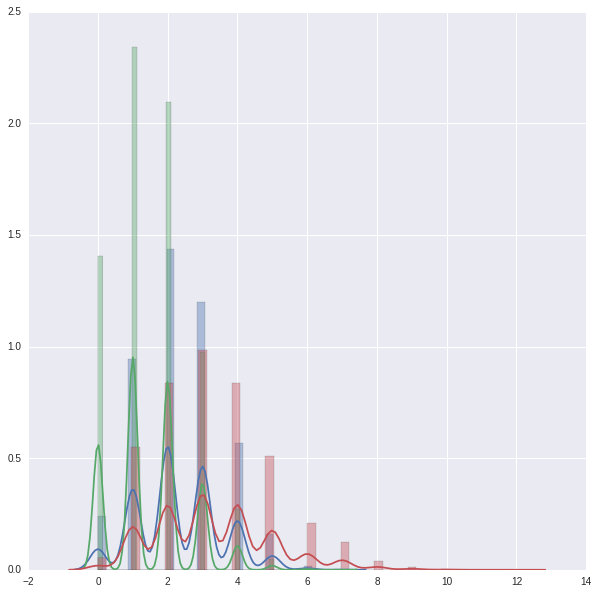

In [12]:
plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 0, 0]))
ax = sns.distplot(pd.DataFrame(X_public[:, 0, 0]))
ax = sns.distplot(pd.DataFrame(X_private[:, 0, 0]))

plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 0, 11]))
ax = sns.distplot(pd.DataFrame(X_public[:, 0, 11]))
ax = sns.distplot(pd.DataFrame(X_private[:, 0, 11]))

plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 1, 0]))
ax = sns.distplot(pd.DataFrame(X_public[:, 1, 0]))
ax = sns.distplot(pd.DataFrame(X_private[:, 1, 0]))

plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 1, 11]))
ax = sns.distplot(pd.DataFrame(X_public[:, 1, 11]))
ax = sns.distplot(pd.DataFrame(X_private[:, 1, 11]))

plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 2, 0]))
ax = sns.distplot(pd.DataFrame(X_public[:, 2, 0]))
ax = sns.distplot(pd.DataFrame(X_private[:, 2, 0]))

plt.figure(figsize=(10, 10))
ax = sns.distplot(pd.DataFrame(X_train[:, 2, 11]))
ax = sns.distplot(pd.DataFrame(X_public[:, 2, 11]))
ax = sns.distplot(pd.DataFrame(X_private[:, 2, 11]))

## Figure 1A - Transfer Learning

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

real_score_list = []
public_score_list = []
private_score_list = []

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_real = X_real.reshape(X_real.shape[0], -1)
X_public = X_public.reshape(X_public.shape[0], -1)
X_private = X_private.reshape(X_private.shape[0], -1)

print(X_train.shape, X_test.shape, X_real.shape, X_public.shape, X_private.shape)
print(y_train.shape, y_test.shape)

transfer_clf = RandomForestClassifier()
for i in range(10):
        real_y_pred = transfer_clf.fit(X_train, y_train).predict(X_test)
        real_score_list.append(accuracy_score(y_test, real_y_pred))

        public_y_pred = transfer_clf.fit(X_public, y_public).predict(X_test)
        public_score_list.append(accuracy_score(y_test, public_y_pred))
        
        private_y_pred = transfer_clf.fit(X_private, y_private).predict(X_test)
        private_score_list.append(accuracy_score(y_test, private_y_pred))
        
print(real_score_list)
print(public_score_list)
print(private_score_list)

((6000, 36), (502, 36), (6502, 36), (6000, 36), (6000, 36))
((6000,), (502,))
[0.90039840637450197, 0.92031872509960155, 0.92231075697211151, 0.92231075697211151, 0.92430278884462147, 0.90637450199203184, 0.91832669322709159, 0.91832669322709159, 0.9322709163346613, 0.91633466135458164]
[0.88247011952191234, 0.89043824701195218, 0.88844621513944222, 0.88844621513944222, 0.88047808764940239, 0.89641434262948205, 0.88844621513944222, 0.88047808764940239, 0.88844621513944222, 0.91035856573705176]
[0.86653386454183268, 0.86852589641434264, 0.8844621513944223, 0.86454183266932272, 0.84860557768924305, 0.82669322709163351, 0.87450199203187251, 0.87051792828685259, 0.88247011952191234, 0.86852589641434264]


(0.5, 1)

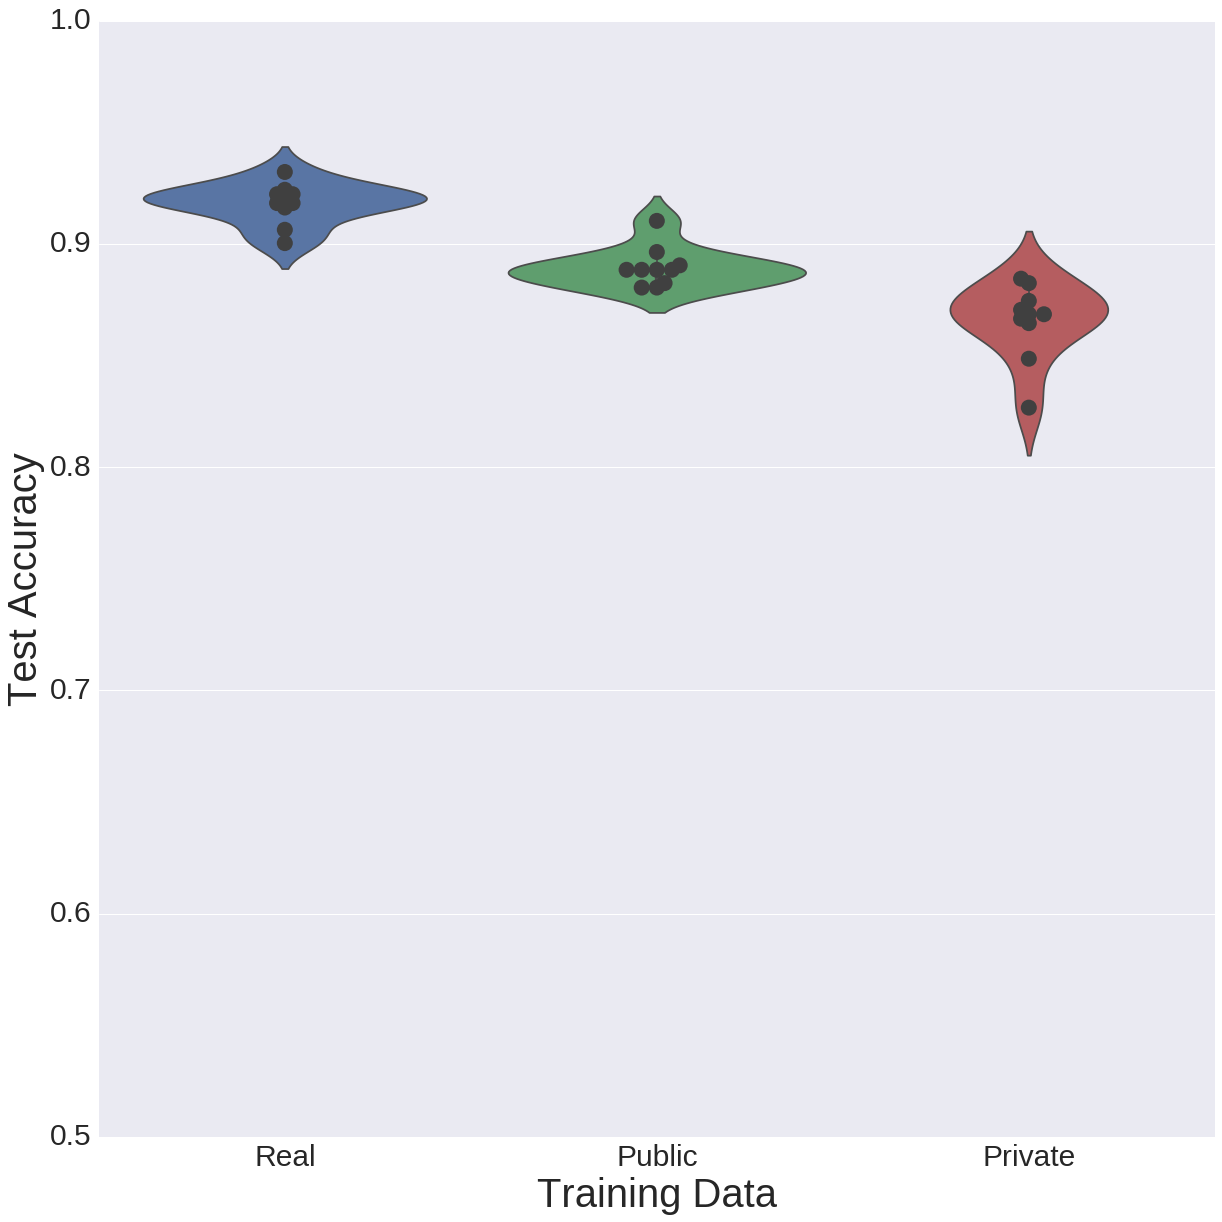

In [80]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 40,
          'axes.titlesize':'x-large',
          'xtick.labelsize':30,
          'ytick.labelsize':30}
pylab.rcParams.update(params)

plt.figure(figsize=(20, 20))
plt.ylabel('Test Accuracy')
plt.xlabel('Training Data')
transfer_scores = pd.DataFrame.from_dict({'Private': private_score_list,
                                          'Real': real_score_list,
                                          'Public': public_score_list})
cat_list = ["Real", "Public", "Private"]
ax = sns.violinplot(data=transfer_scores, order=cat_list)
ax = sns.swarmplot(data=transfer_scores, size=16, color=".25", order=cat_list)
ax.set_ylim([0.5,1])

## Figure 1B - Correlation Matrix

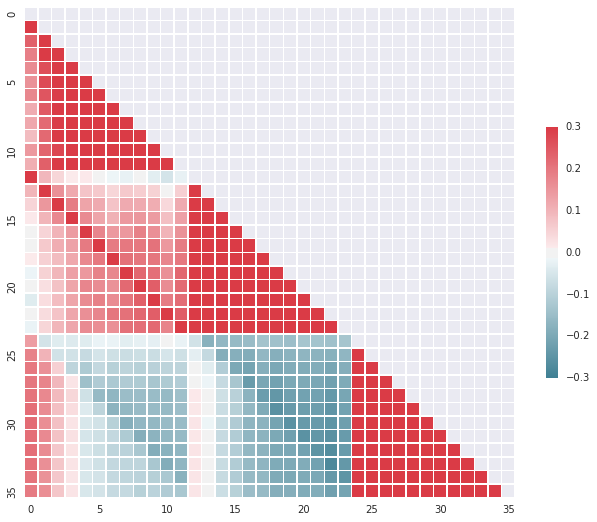

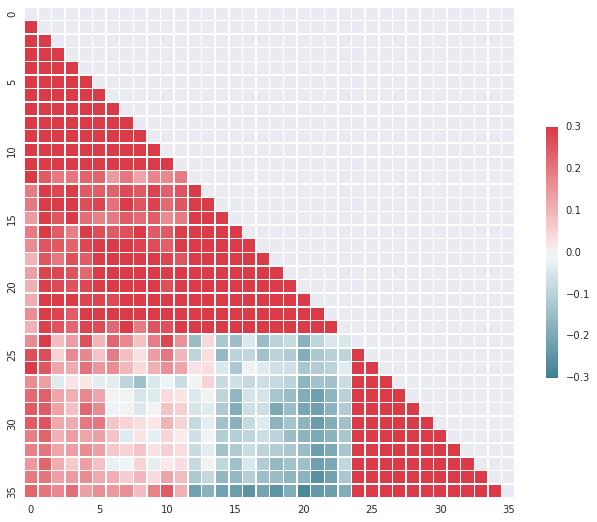

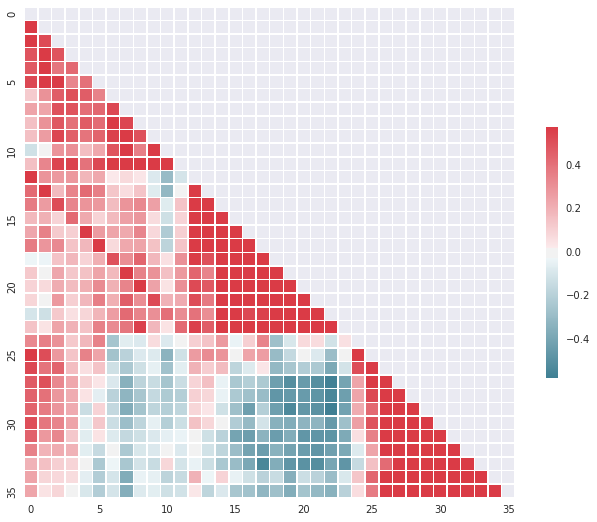

In [54]:
f, ax = plt.subplots(figsize=(11, 9))

d = pd.DataFrame(X_train)
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

f, ax = plt.subplots(figsize=(11, 9))

d = pd.DataFrame(X_public)
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

f, ax = plt.subplots(figsize=(11, 9))

d = pd.DataFrame(X_private)
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Figure 1C? - PCA

(6000, 36)
[ 0.32102973  0.16801213]
(12000, 36)
[ 0.39522725  0.15623615]
(12000, 36)
[ 0.34528604  0.17641837]


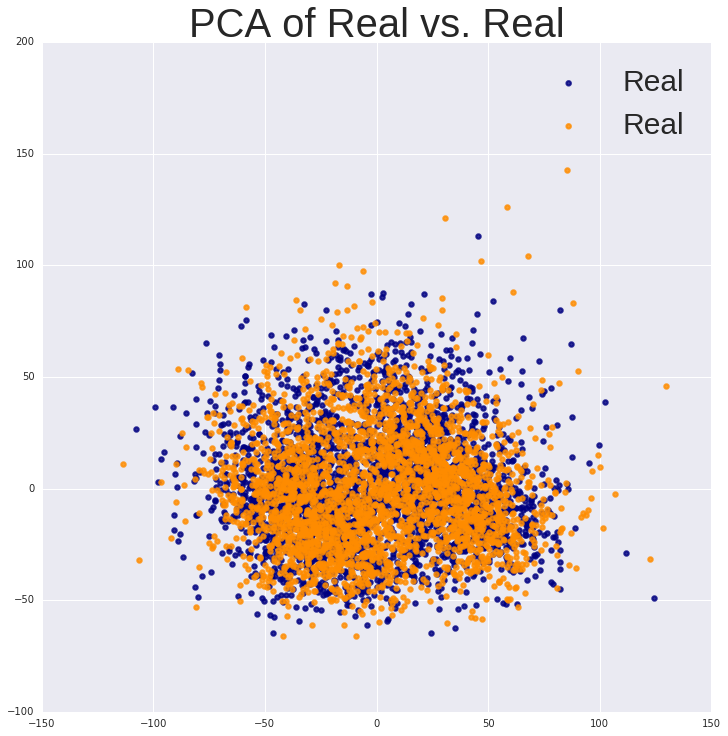

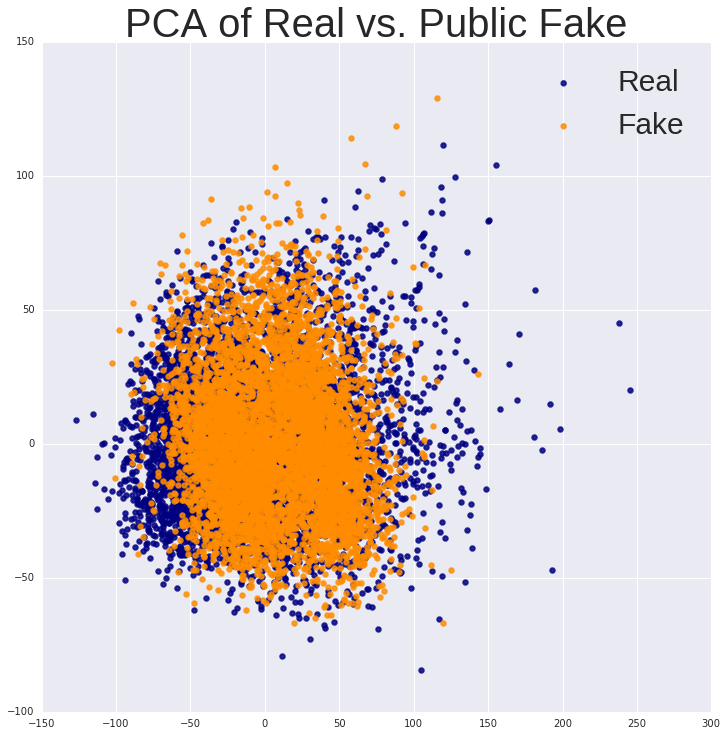

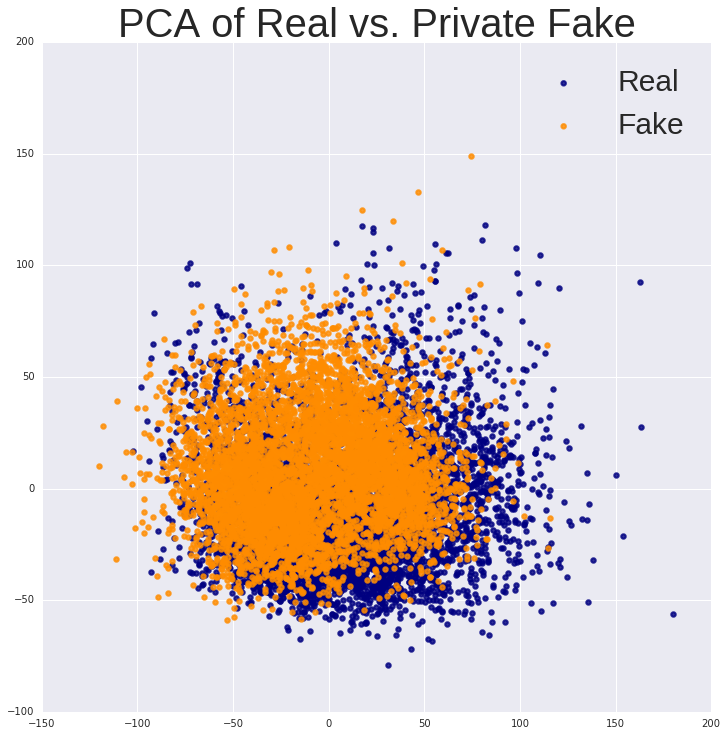

In [83]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 30,
          'axes.labelsize': 15,
          'axes.titlesize': 40,
          'xtick.labelsize':10,
          'ytick.labelsize':10}
pylab.rcParams.update(params)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

plt.figure(figsize=(12, 12))
X_pca = np.concatenate((X_train[:3000], X_train[3000:]))
print(X_pca.shape)

y = np.array([1] * 3000 + [0] * 3000)
pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

target_names = ['Real', 'Real']
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of Real vs. Real')

print(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 12))
X_pca = np.concatenate((X_train, X_public))
print(X_pca.shape)

y = np.array([1] * 6000 + [0] * 6000)
pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

target_names = ['Real', 'Fake']
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of Real vs. Public Fake')

print(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 12))
X_pca = np.concatenate((X_train, X_private))
print(X_pca.shape)

y = np.array([1] * 6000 + [0] * 6000)
pca = PCA(n_components=2)
X_r = pca.fit(X_pca).transform(X_pca)

target_names = ['Real', 'Fake']
colors = ['navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('PCA of Real vs. Private Fake')

print(pca.explained_variance_ratio_)

## Figure 2 - Privacy Analysis